In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [1]:
path = "trained_models/UNet_1D_15M/logs/training_metrics.csv"

In [4]:
data = np.loadtxt(path, delimiter=",", skiprows=1)

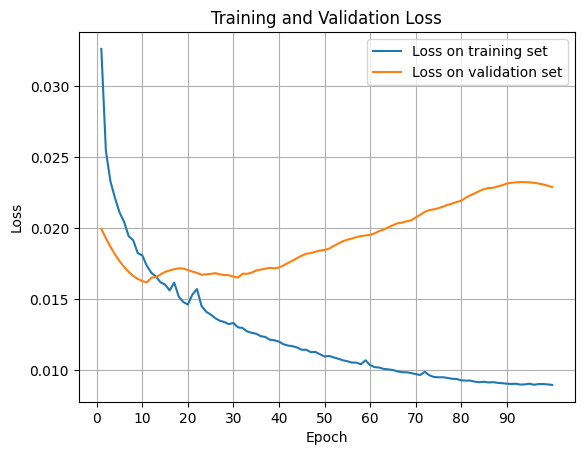

In [5]:
# plot training and validation loss
plt.plot(data[:, 0], data[:, 1], label="Loss on training set")
plt.plot(data[:, 0], savgol_filter(data[:, 3], window_length=21, polyorder=2), label="Loss on validation set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, data[-1, 0], 10))
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

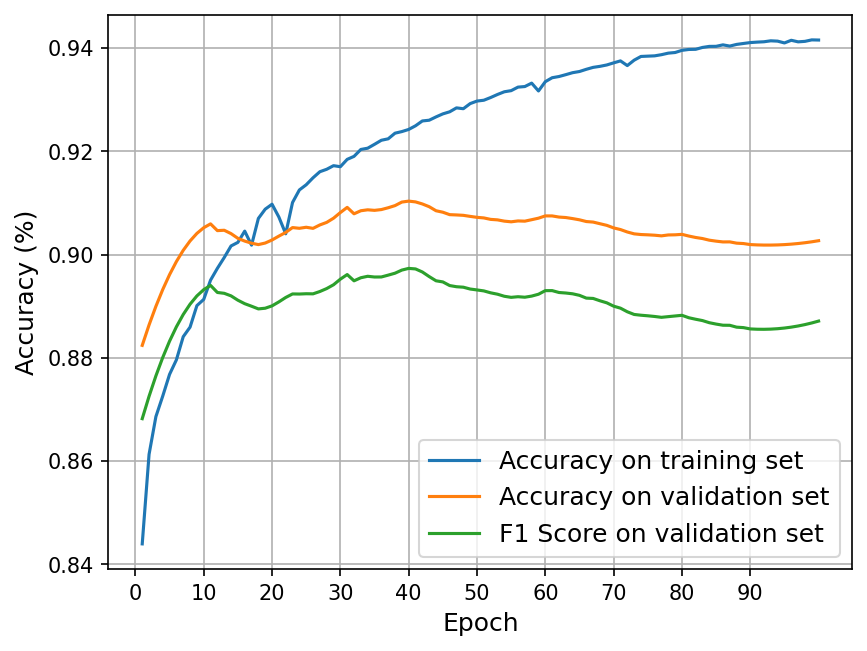

In [6]:
# plot training and validation accuracy
plt.figure(dpi=150)  # Increased size and resolution
plt.plot(data[:, 0], data[:, 2], label="Accuracy on training set")
plt.plot(data[:, 0], savgol_filter(data[:, 4], window_length=21, polyorder=2), label="Accuracy on validation set")
plt.plot(data[:, 0], savgol_filter(data[:, 5], window_length=21, polyorder=2), label="F1 Score on validation set")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(np.arange(0, data[-1, 0], 10))
plt.legend(fontsize=12)
plt.grid()
plt.show()

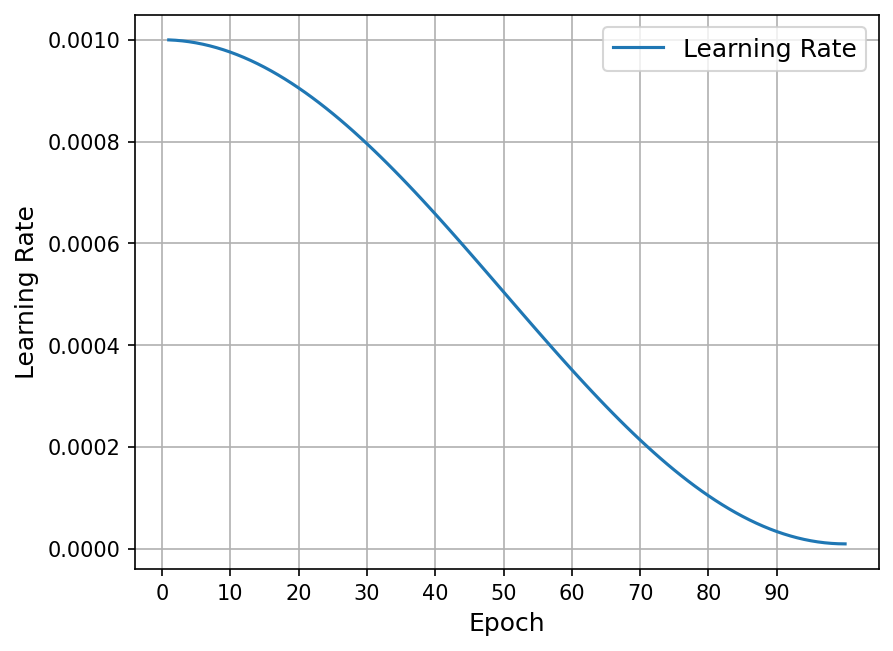

In [6]:
# plot validation learning rate
plt.figure(dpi=150)  # Increased size and resolution
plt.plot(data[:, 0], data[:, 6], label="Learning Rate")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Learning Rate", fontsize=12)
plt.xticks(np.arange(0, data[-1, 0], 10))
plt.legend(fontsize=12)
plt.grid()
plt.show()

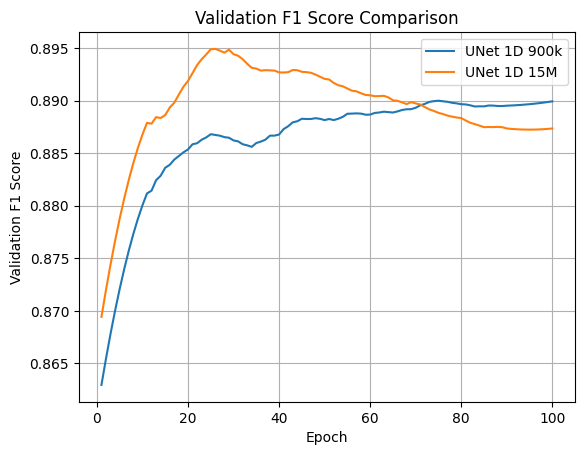

In [7]:
# val f1 score comparison

UNet_1D_900k = np.loadtxt("trained_models/UNet_1D_900k/logs/training_metrics.csv", delimiter=",", skiprows=1)
UNet_1D_15M = np.loadtxt("trained_models/UNet_1D_15M/logs/training_metrics.csv", delimiter=",", skiprows=1)

plt.figure()
plt.plot(UNet_1D_900k[:, 0], savgol_filter(UNet_1D_900k[:, 5], window_length=21, polyorder=2), label="UNet 1D 900k")
plt.plot(UNet_1D_15M[:, 0], savgol_filter(UNet_1D_15M[:, 5], window_length=21, polyorder=2), label="UNet 1D 15M")
plt.xlabel("Epoch")
plt.ylabel("Validation F1 Score")
plt.title("Validation F1 Score Comparison")
plt.legend()
plt.grid()
plt.show()

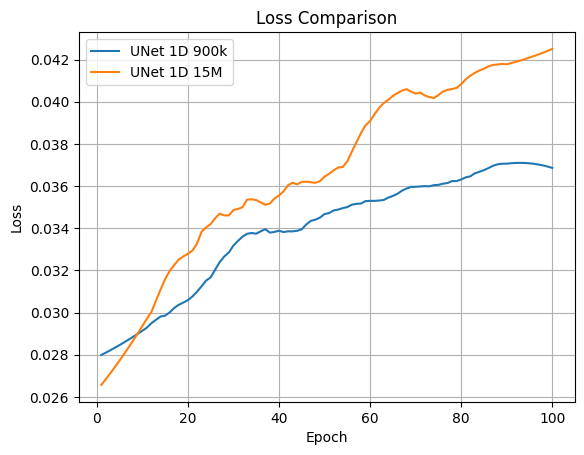

In [8]:
# validation loss comparison
plt.figure()
plt.plot(UNet_1D_900k[:, 0], savgol_filter(UNet_1D_900k[:, 3], window_length=21, polyorder=2), label="UNet 1D 900k")
plt.plot(UNet_1D_15M[:, 0], savgol_filter(UNet_1D_15M[:, 3], window_length=21, polyorder=2), label="UNet 1D 15M")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid()
plt.show()